# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

import pandas as pd
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# Import Data

In [2]:
dfTrain = pd.read_csv(r"C:\Users\TE435942\.kaggle\Titanic\train.csv")

# Data Overview

In [3]:
dfTrain.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Ticket may provide good information to family groupings, but it seems hard to deal with and may just be a jumbled mess of strings. Similarly, Cabin would very likely provide good information, but only 23% of the entries have information. <br><br>Let's go ahead and drop both of these parameters with the following function.

In [5]:
def dropTicketCabin(df):
    
    df = df.drop(columns = ['Ticket','Cabin'])
    
    return df

In [6]:
dfTrain = dropTicketCabin(dfTrain)
dfTrain.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C


## Now that we're a little cleaner, we know we'll need to convert Sex and Embarked to useful values.

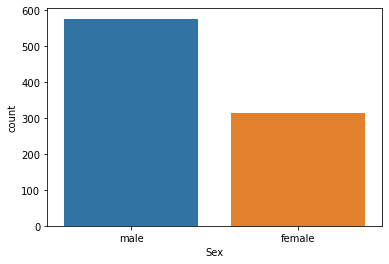

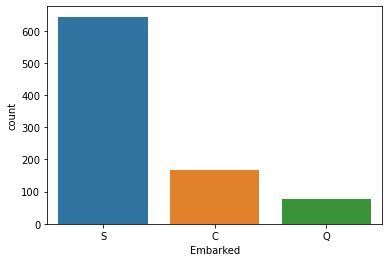

In [7]:
sns.countplot(x='Sex',data=dfTrain)
plt.show()
sns.countplot(x='Embarked',data=dfTrain)
plt.show()

## For Sex, we will set 'male' = 0 and 'female' = 1.<br><br>For Embarked, we will set 'S' = 1, 'C' = 2, and 'Q' = 3, and we will assume the two missing values also embarked from 'S'. The following function accomplishes these transformations:

In [8]:
def codeSexAndEmbarked(df):
    
    df.Sex.loc[df.Sex == 'male'] = 0
    df.Sex.loc[df.Sex == 'female'] = 1
    df.Embarked.loc[df.Embarked == 'S'] = 1
    df.Embarked.loc[df.Embarked == 'C'] = 2
    df.Embarked.loc[df.Embarked == 'Q'] = 3
    df.Embarked.loc[df.Embarked.isnull()] = 1
    
    df.Sex = df.Sex.astype('int64')
    df.Embarked = df.Embarked.astype('int64')
    
    return df

In [9]:
dfTrain = codeSexAndEmbarked(dfTrain)
dfTrain.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,1


## Even cleaner. There's an issue though: age is missing a significant number of values. We would expect age to have a large impact on whether or not a person survives. Let's see if we can get a general understanding of how age relates to the other parameters. We'll start with names and see if there is a relationship between a person's title and their age. The following function extracts a person's title from their name and makes a new parameter in the dataframe 'Title'.

In [10]:
def addTitles(df):
    
    allTitles = []
    for i in range(len(df.Name)):
        lastName, comma, firstName = df.Name[i].partition(', ')
        title, space, name = firstName.partition(' ')
        allTitles.append(title)

    df.insert(4,'Title',allTitles,True)
    return df

In [11]:
dfTrain = addTitles(dfTrain)
dfTrain.head(10)

,PassengerId,Survived,Pclass,Name,Title,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",Mr.,0,22.0,1,0,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs.,1,38.0,1,0,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",Miss.,1,26.0,0,0,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs.,1,35.0,1,0,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",Mr.,0,35.0,0,0,8.0500,1
5,6,0,3,"Moran, Mr. James",Mr.,0,NaN,0,0,8.4583,3
6,7,0,1,"McCarthy, Mr. Timothy J",Mr.,0,54.0,0,0,51.8625,1
7,8,0,3,"Palsson, Master. Gosta Leonard",Master.,0,2.0,3,1,21.0750,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Mrs.,1,27.0,0,2,11.1333,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",Mrs.,1,14.0,1,0,30.0708,2


# Great, now let's see how frequently certain titles appear.

In [12]:
dfTrain.Title.value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Col.           2
Major.         2
Jonkheer.      1
Mme.           1
Capt.          1
the            1
Ms.            1
Lady.          1
Sir.           1
Don.           1
Name: Title, dtype: int64

# It looks like there are four relevant titles and a number of less frequent/specialized titles. We can assume that if someone is a doctor, reverend, colonel, or Jonkheer, they're probably an adult. Let's break down the relevant titles of Mr., Miss., Mrs., and Master.

In [13]:
relevantTitles = ['Mr.','Miss.','Mrs.','Master.']

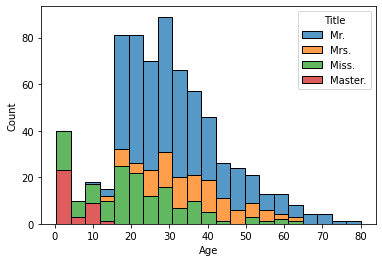

In [14]:
sns.histplot(x='Age',hue = 'Title',multiple = 'stack',data=dfTrain.loc[dfTrain.Title.isin(relevantTitles)])
plt.show()

In [15]:
dfTrain.loc[dfTrain.Title == 'Mr.','Age'].describe()

count    398.000000
mean      32.368090
std       12.708793
min       11.000000
25%       23.000000
50%       30.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

In [16]:
dfTrain.loc[dfTrain.Title == 'Mrs.','Age'].describe()

count    108.000000
mean      35.898148
std       11.433628
min       14.000000
25%       27.750000
50%       35.000000
75%       44.000000
max       63.000000
Name: Age, dtype: float64

In [17]:
dfTrain.loc[dfTrain.Title == 'Master.','Age'].describe()

count    36.000000
mean      4.574167
std       3.619872
min       0.420000
25%       1.000000
50%       3.500000
75%       8.000000
max      12.000000
Name: Age, dtype: float64

In [18]:
dfTrain.loc[dfTrain.Title == 'Miss.','Age'].describe()

count    146.000000
mean      21.773973
std       12.990292
min        0.750000
25%       14.125000
50%       21.000000
75%       30.000000
max       63.000000
Name: Age, dtype: float64

# It looks like if you are a Mr. or Mrs., you are almost definitely an adult. If you are a master, you are a boy child. If you are a Miss., you could go either way.<br><br>Let's take a closer look at Miss. across the other parameters 'Parch', 'SibSp', and 'Pclass'.

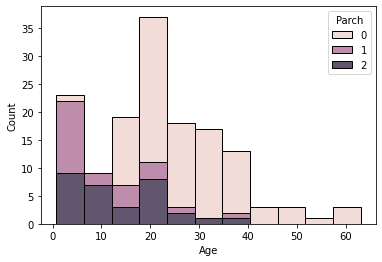

,Age
count,91.000000
mean,27.763736
std,11.048716
min,5.000000
25%,20.000000
50%,26.000000
75%,32.750000
max,63.000000


In [19]:
sns.histplot(x='Age',hue = 'Parch',multiple = 'stack',data=dfTrain.loc[dfTrain.Title == 'Miss.'])
plt.show()
meanMissParch0 = dfTrain.loc[(dfTrain.Title == 'Miss.')&(dfTrain.Parch == 0),'Age'].mean()
meanMissParch1 = dfTrain.loc[(dfTrain.Title == 'Miss.')&(dfTrain.Parch == 1),'Age'].mean()
meanMissParch2 = dfTrain.loc[(dfTrain.Title == 'Miss.')&(dfTrain.Parch == 2),'Age'].mean()

MissParchZero = pd.DataFrame(dfTrain.loc[(dfTrain.Title == 'Miss.')&(dfTrain.Parch == 0),'Age'].describe())
MissParchZero

In [20]:
MissParchOneTwo = pd.DataFrame(dfTrain.loc[(dfTrain.Title == 'Miss.')&(dfTrain.Parch >= 1),'Age'].describe())
MissParchOneTwo

,Age
count,55.000000
mean,11.863636
std,9.442911
min,0.750000
25%,4.000000
50%,9.000000
75%,18.000000
max,39.000000


In [21]:
dfTrain.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

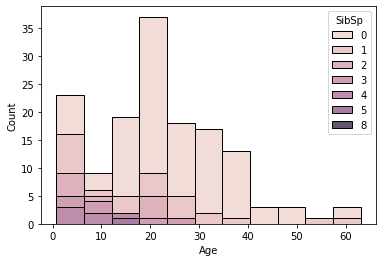

,Age
count,100.000000
mean,24.700000
std,11.656056
min,1.000000
25%,18.000000
50%,22.500000
75%,30.625000
max,58.000000


In [22]:
sns.histplot(x='Age',hue = 'SibSp',multiple = 'stack',data=dfTrain.loc[dfTrain.Title == 'Miss.'])
plt.show()
meanMissSibSp0 = pd.DataFrame(dfTrain.loc[(dfTrain.Title == 'Miss.')&(dfTrain.SibSp == 0),'Age'].describe())
meanMissSibSp1 = pd.DataFrame(dfTrain.loc[(dfTrain.Title == 'Miss.')&(dfTrain.SibSp == 1),'Age'].describe())
meanMissSibSp2Plus = pd.DataFrame(dfTrain.loc[(dfTrain.Title == 'Miss.')&(dfTrain.SibSp >= 2),'Age'].describe())

meanMissSibSp0

In [23]:
meanMissSibSp1

,Age
count,24.000000
mean,19.854167
std,16.204856
min,1.000000
25%,4.750000
50%,19.500000
75%,25.500000
max,63.000000


In [24]:
meanMissSibSp2Plus

,Age
count,22.000000
mean,10.568182
std,7.779775
min,0.750000
25%,4.250000
50%,9.000000
75%,17.750000
max,24.000000


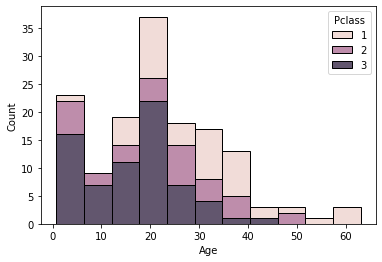

,Age
count,45.000000
mean,30.000000
std,12.852308
min,2.000000
25%,21.000000
50%,30.000000
75%,36.000000
max,63.000000


In [25]:
sns.histplot(x='Age',hue = 'Pclass',multiple = 'stack',data=dfTrain.loc[dfTrain.Title == 'Miss.'])
plt.show()

meanMissClass1 = pd.DataFrame(dfTrain.loc[(dfTrain.Title == 'Miss.')&(dfTrain.Pclass == 1),'Age'].describe())
meanMissClass2 = pd.DataFrame(dfTrain.loc[(dfTrain.Title == 'Miss.')&(dfTrain.Pclass == 2),'Age'].describe())
meanMissClass3 = pd.DataFrame(dfTrain.loc[(dfTrain.Title == 'Miss.')&(dfTrain.Pclass == 3),'Age'].describe())

meanMissClass1

In [26]:
meanMissClass2

,Age
count,32.000000
mean,22.390625
std,13.374708
min,2.000000
25%,11.750000
50%,24.000000
75%,30.625000
max,50.000000


In [27]:
meanMissClass3

,Age
count,69.000000
mean,16.123188
std,9.697315
min,0.750000
25%,9.000000
50%,18.000000
75%,22.000000
max,45.000000


# After reviewing the data above, it looks like if you're a Miss. with a Parch. value of zero you're probably an adult woman. If you're a Miss. with a Parch. value of one or two, you're probably a child.

# We now have enough info to categorize each passenger as a child or an adult, and to fill in missing age information based on the other relevant parameters. This is completed in the function below:

In [28]:
def AgeFill_ChildAdultCat(dfTrain):

    Age_Category = []
    
    for i in range(len(dfTrain.Name)):
        if dfTrain.Age[i] > 16:
            Age_Category.append(1)
        elif dfTrain.Age[i] <= 16:
            Age_Category.append(0)
        elif np.isnan(dfTrain.Age[i]) and dfTrain.Title[i] == 'Mr.':
            Age_Category.append(1)
            dfTrain.loc[i,'Age'] = dfTrain.loc[dfTrain.Title == 'Mr.','Age'].mean()
        elif np.isnan(dfTrain.Age[i]) and dfTrain.Title[i] == 'Mrs.':
            Age_Category.append(1)
            dfTrain.loc[i,'Age'] = dfTrain.loc[dfTrain.Title == 'Mrs.','Age'].mean()
        elif np.isnan(dfTrain.Age[i]) and dfTrain.Title[i] == 'Master.':
            Age_Category.append(0)
            dfTrain.loc[i,'Age'] = dfTrain.loc[dfTrain.Title == 'Master.', 'Age'].mean()
        elif np.isnan(dfTrain.Age[i]) and dfTrain.Title[i] == 'Miss.' and dfTrain.Parch[i] == 0:
            Age_Category.append(1)
            dfTrain.loc[i,'Age'] = dfTrain.loc[(dfTrain.Title == 'Miss.') & (dfTrain.Parch == 0),'Age'].mean()
        elif np.isnan(dfTrain.Age[i]) and dfTrain.Title[i] == 'Miss.' and dfTrain.Parch[i] >= 1:
            Age_Category.append(0)
            dfTrain.loc[i,'Age'] = dfTrain.loc[(dfTrain.Title == 'Miss.') & (dfTrain.Parch >= 1),'Age'].mean()
        elif np.isnan(dfTrain.Age[i]):
            Age_Category.append(1)
            dfTrain.loc[i,'Age'] = dfTrain.Age.mean()
            
    dfTrain.insert(7,'Age_Cat',Age_Category,True)
    dfTrain.Age = dfTrain.Age.round(decimals = 0)
    
    return dfTrain

In [29]:
dfTrain = AgeFill_ChildAdultCat(dfTrain)
dfTrain.head(10)

,PassengerId,Survived,Pclass,Name,Title,Sex,Age,Age_Cat,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",Mr.,0,22.0,1,1,0,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs.,1,38.0,1,1,0,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",Miss.,1,26.0,1,0,0,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs.,1,35.0,1,1,0,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",Mr.,0,35.0,1,0,0,8.0500,1
5,6,0,3,"Moran, Mr. James",Mr.,0,32.0,1,0,0,8.4583,3
6,7,0,1,"McCarthy, Mr. Timothy J",Mr.,0,54.0,1,0,0,51.8625,1
7,8,0,3,"Palsson, Master. Gosta Leonard",Master.,0,2.0,0,3,1,21.0750,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Mrs.,1,27.0,1,0,2,11.1333,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",Mrs.,1,14.0,0,1,0,30.0708,2


In [30]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Title        891 non-null    object 
 5   Sex          891 non-null    int64  
 6   Age          891 non-null    float64
 7   Age_Cat      891 non-null    int64  
 8   SibSp        891 non-null    int64  
 9   Parch        891 non-null    int64  
 10  Fare         891 non-null    float64
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 83.7+ KB


# Couple more things: Here are a few functions I wrote in my last attempt to break apart SibSp into two parameters - SpOnboard and SibOnboard. It isn't pretty but I think it works kind of well.

In [31]:
#This function assumes that a woman has the title Mrs., Miss, or Ms. If the woman is married and the title is different,
#their SpouseAboard value will be 0.

def spouseAboard(dataframe1):
    
    dataframe = dataframe1.copy()
    names = list(dataframe['Name'])
    genders = list(dataframe['Sex'])
    mrs = []
    miss = []
    accompaniedHusbands = []
    accompaniedWives = []
    
    for i in range(len(names)):
        if 'MRS.' in names[i].upper() or 'MRS' in names[i].upper():
            mrs.append(names[i])

    for i in range(len(names)):
        if 'MISS.' in names[i].upper() or 'MS.' in names[i].upper() in names[i]:
            miss.append(names[i])

    namesWithoutMrs = [x for x in names if x not in mrs]

    for i in range(len(namesWithoutMrs)):
        for j in range(len(mrs)):
        
            mrLastName, titlemr, mrFirstName = namesWithoutMrs[i].partition(',')
            scrap1,scrap2,mrFirstName = mrFirstName.partition('. ')
            mrFullName = mrFirstName +  ' ' + mrLastName
            mrFullName = mrFullName.strip()

            mrsLastName,titlemrs,mrsFirstName = mrs[j].partition(', ')
            scrap1,scrap2,mrsFirstName = mrsFirstName.partition('. ')
            mrsFirstName,scrap1,scrap2 = mrsFirstName.partition(' (')
            mrsFullName = mrsFirstName + ' ' + mrsLastName
            mrsFullName = mrsFullName.strip()
        
            if mrFullName == mrsFullName:
                accompaniedHusbands.append(namesWithoutMrs[i])
                accompaniedWives.append(mrs[j])
                
    #List of men and women with husbands and wives aboard.            
    spouseIsAboard = accompaniedWives + accompaniedHusbands
    
    aboard = []
    for i in range(len(names)):
        index = 0
        for j in range(len(spouseIsAboard)):
            if names[i] == spouseIsAboard[j]:
                index = 1
        aboard.append(index)
        
    dataframe.insert(9,'SpOnboard',aboard,True)
    
                   
    return dataframe
        

In [32]:
dfTrain = spouseAboard(dfTrain)

In [33]:
dfTrain.head(10)

,PassengerId,Survived,Pclass,Name,Title,Sex,Age,Age_Cat,SibSp,SpOnboard,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",Mr.,0,22.0,1,1,0,0,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs.,1,38.0,1,1,0,0,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",Miss.,1,26.0,1,0,0,0,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs.,1,35.0,1,1,1,0,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",Mr.,0,35.0,1,0,0,0,8.0500,1
5,6,0,3,"Moran, Mr. James",Mr.,0,32.0,1,0,0,0,8.4583,3
6,7,0,1,"McCarthy, Mr. Timothy J",Mr.,0,54.0,1,0,0,0,51.8625,1
7,8,0,3,"Palsson, Master. Gosta Leonard",Master.,0,2.0,0,3,0,1,21.0750,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Mrs.,1,27.0,1,0,0,2,11.1333,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",Mrs.,1,14.0,0,1,1,0,30.0708,2


In [34]:
def SibsAboard(dataframe1):    
    dataframe = dataframe1.copy()
    names = list(dataframe['Name'])
    sibsp = list(dataframe['SibSp'])
    spouse = list(dataframe['SpOnboard'])
    aboard = []
    
    for i in range(len(names)):
        if sibsp[i] > 0:
            aboard.append(sibsp[i]-spouse[i])
        else:
            aboard.append(0)
                
    dataframe.insert(10,'SibsOnboard',aboard,True)
    dataframe = dataframe.drop(columns = 'SibSp')
    
    return dataframe

In [35]:
dfTrain = SibsAboard(dfTrain)
dfTrain.head(10)

,PassengerId,Survived,Pclass,Name,Title,Sex,Age,Age_Cat,SpOnboard,SibsOnboard,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",Mr.,0,22.0,1,0,1,0,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs.,1,38.0,1,0,1,0,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",Miss.,1,26.0,1,0,0,0,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs.,1,35.0,1,1,0,0,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",Mr.,0,35.0,1,0,0,0,8.0500,1
5,6,0,3,"Moran, Mr. James",Mr.,0,32.0,1,0,0,0,8.4583,3
6,7,0,1,"McCarthy, Mr. Timothy J",Mr.,0,54.0,1,0,0,0,51.8625,1
7,8,0,3,"Palsson, Master. Gosta Leonard",Master.,0,2.0,0,0,3,1,21.0750,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Mrs.,1,27.0,1,0,0,2,11.1333,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",Mrs.,1,14.0,0,1,0,0,30.0708,2


# Okay just one more thing. Let's change Title into a numeric value too where we assign each relevant title its own value and all of the peculiar ones a catch all.

In [36]:
def numTitle(df):
    relevantTitles = ['Mr.','Miss.','Mrs.','Master']
    
    df.loc[df.Title == 'Mr.', 'Title'] = 1
    df.loc[df.Title == 'Miss.', 'Title'] = 2
    df.loc[df.Title == 'Mrs.', 'Title'] = 3
    df.loc[df.Title == 'Master.', 'Title'] = 4
    df.loc[(df.Title != 1) & (df.Title != 2) & (df.Title != 3) & (df.Title != 4), 'Title'] = 5
    
    df.Title = df.Title.astype('int64')
    
    return df

In [37]:
dfTrain = numTitle(dfTrain)

In [38]:
dfTrain.head(10)

,PassengerId,Survived,Pclass,Name,Title,Sex,Age,Age_Cat,SpOnboard,SibsOnboard,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,0,22.0,1,0,1,0,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",3,1,38.0,1,0,1,0,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",2,1,26.0,1,0,0,0,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",3,1,35.0,1,1,0,0,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",1,0,35.0,1,0,0,0,8.0500,1
5,6,0,3,"Moran, Mr. James",1,0,32.0,1,0,0,0,8.4583,3
6,7,0,1,"McCarthy, Mr. Timothy J",1,0,54.0,1,0,0,0,51.8625,1
7,8,0,3,"Palsson, Master. Gosta Leonard",4,0,2.0,0,0,3,1,21.0750,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",3,1,27.0,1,0,0,2,11.1333,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",3,1,14.0,0,1,0,0,30.0708,2


# Now that we're happy with how the data looks directly above, let's go ahead and prepare the data for the model by running all of the above functions on clean training and test datasets.

In [39]:
dfTrain = pd.read_csv(r"C:\Users\TE435942\.kaggle\Titanic\train.csv")
dfTest = pd.read_csv(r"C:\Users\TE435942\.kaggle\Titanic\test.csv")

In [40]:
def transform(df):
    
    df = dropTicketCabin(df)
    df = codeSexAndEmbarked(df)
    df = addTitles(df)
    df = AgeFill_ChildAdultCat(df)
    df = spouseAboard(df)
    df = SibsAboard(df)
    df = numTitle(df)
    df.Fare = df.Fare.fillna(df.Fare.mean())
    df.Fare = df.Fare.round(0)
    
    return df
    

In [41]:
dfTrain = transform(dfTrain)
dfTest = transform(dfTest)

In [42]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Title        891 non-null    int64  
 5   Sex          891 non-null    int64  
 6   Age          891 non-null    float64
 7   Age_Cat      891 non-null    int64  
 8   SpOnboard    891 non-null    int64  
 9   SibsOnboard  891 non-null    int64  
 10  Parch        891 non-null    int64  
 11  Fare         891 non-null    float64
 12  Embarked     891 non-null    int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 90.6+ KB


In [43]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Title        418 non-null    int64  
 5   Age          418 non-null    float64
 6   Age_Cat      418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   SpOnboard    418 non-null    int64  
 9   SibsOnboard  418 non-null    int64  
 10  Fare         418 non-null    float64
 11  Embarked     418 non-null    int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 39.3+ KB


# Model Time

## Based off the Heat Map, let's try to only pick the features that have significant correlation with Survived in the Training Set.

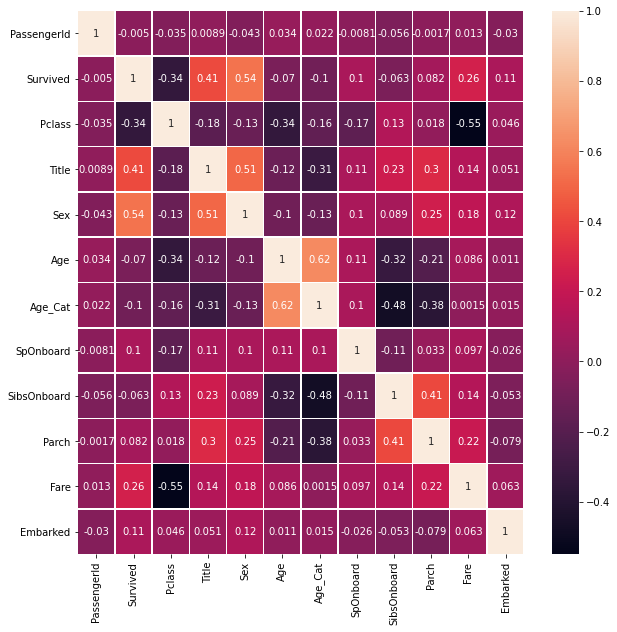

In [44]:
fig, ax = plt.subplots(figsize=(10,10))     
sns.heatmap(dfTrain.corr(), annot = True,linewidths=.5, ax=ax)
plt.show()

In [45]:
from sklearn.ensemble import RandomForestClassifier

allFeatures = ['Pclass','Title','Sex','Age','Age_Cat','SpOnboard','SibsOnboard','Parch','Fare','Embarked']

dfTrain1 = dfTrain.drop(columns = ['Name','Survived','PassengerId'])

rforest_checker = RandomForestClassifier(random_state = 0)
rforest_checker.fit(dfTrain1, dfTrain.Survived)
importances_df = pd.DataFrame(rforest_checker.feature_importances_, columns=['Feature_Importance'],
                              index=dfTrain1.columns)
importances_df.sort_values(by=['Feature_Importance'], ascending=False, inplace=True)
print(importances_df)

             Feature_Importance
Age                    0.240981
Fare                   0.185131
Title                  0.171043
Sex                    0.163493
Pclass                 0.088134
SibsOnboard            0.058869
Embarked               0.034109
Parch                  0.032743
Age_Cat                0.013077
SpOnboard              0.012420


In [46]:
features = ['Age','Title','Sex','Fare','Title','Pclass']

In [47]:
y = dfTrain["Survived"]

X = pd.get_dummies(dfTrain[features])
X_test = pd.get_dummies(dfTest[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId':dfTest.PassengerId, 'Survived':predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
